In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,cross_val_score


In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df["age"].max()

np.int64(64)

In [7]:
df["bmi"].max()

np.float64(53.13)

In [8]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
df["bmi"].max()

np.float64(53.13)

In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Outlier_Detection

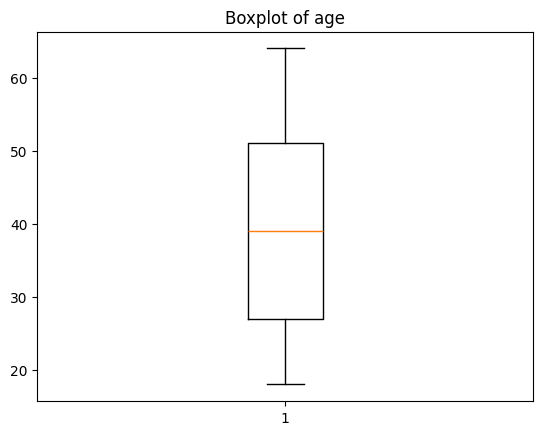

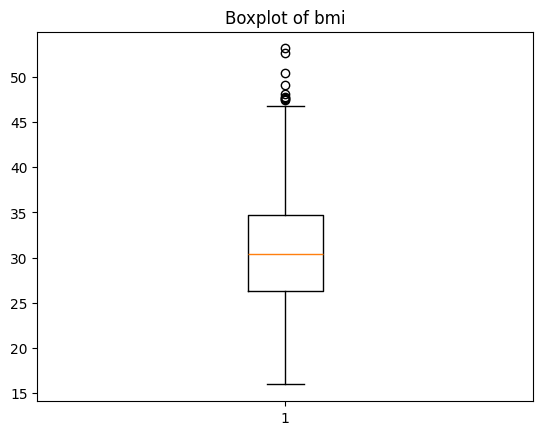

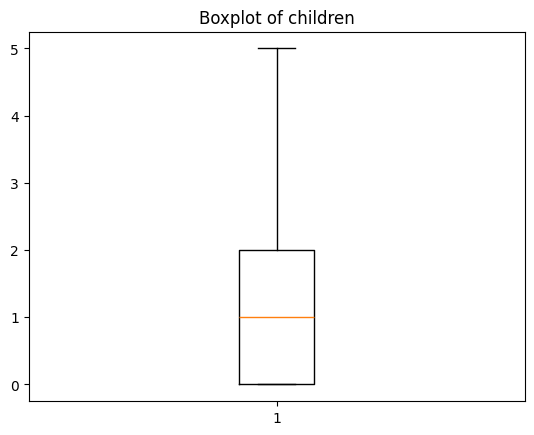

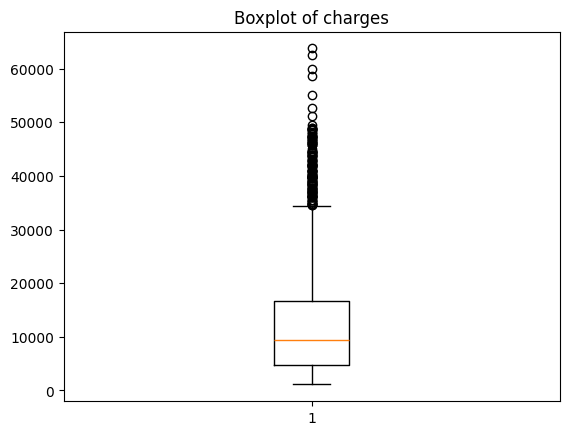

In [12]:
for i in df:
    if df[i].dtype in ["float64","int64"]:
        plt.boxplot(df[i])
        plt.title(f'Boxplot of {i}')
        plt.show()

## Label Encoding

In [13]:
le_gender=LabelEncoder()
df["sex"]=le_gender.fit_transform(df["sex"])


In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [15]:
le_smoking=LabelEncoder()
df["smoker"]=le_smoking.fit_transform(df['smoker'])

In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [17]:
x=df.drop(columns="charges")
y=df["charges"]

In [18]:
onehot=OneHotEncoder()
onehot=OneHotEncoder(drop="first",sparse_output=False)
onehot.fit(df[["region"]])

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [24]:
x=pd.get_dummies(x,["region"],drop_first=True,dtype=int)

In [ ]:
df['']

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [21]:
df["region_southwest"].dtype

dtype('int64')

In [25]:
x.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object

## Scaling

In [26]:
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)

## Data Spliting

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

## Training

In [44]:
models=[XGBRegressor(),RandomForestRegressor(),AdaBoostRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),SVR()]
for model in models:
    print(str(model).split('(')[0])
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"  R2 Score : {r2:.4f}")
    print(f"  MAE      : {mae:.2f}")
    print(f"  RMSE     : {rmse:.2f}")
    print("-" * 40)

XGBRegressor
  R2 Score : 0.8450
  MAE      : 2802.43
  RMSE     : 4905.28
----------------------------------------
RandomForestRegressor
  R2 Score : 0.8618
  MAE      : 2566.47
  RMSE     : 4631.80
----------------------------------------
AdaBoostRegressor
  R2 Score : 0.7858
  MAE      : 5050.13
  RMSE     : 5767.13
----------------------------------------
KNeighborsRegressor
  R2 Score : 0.7860
  MAE      : 3599.65
  RMSE     : 5763.68
----------------------------------------
GradientBoostingRegressor
  R2 Score : 0.8790
  MAE      : 2454.47
  RMSE     : 4335.04
----------------------------------------
SVR
  R2 Score : -0.0696
  MAE      : 8614.64
  RMSE     : 12886.03
----------------------------------------


## Cross Validation


In [46]:
print(cross_val_score(GradientBoostingRegressor(),x,y,cv=5).mean()*100)

85.49141728570312


## Hyper Parameter Tuning

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
param_dist = {
    "n_estimators": randint(100, 600),
    "learning_rate": uniform(0.01, 0.2),
    "max_depth": randint(2, 6),
    "subsample": uniform(0.6, 0.4),
    "min_samples_leaf": randint(1, 10)
}
gbr = GradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(
    gbr,
    param_dist,
    n_iter=30,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)
random_search.fit(x_train, y_train)
print("Best parameters:", random_search.best_params_)
print("Best CV R2:", random_search.best_score_)


Best parameters: {'learning_rate': np.float64(0.024808930346818074), 'max_depth': 4, 'min_samples_leaf': 9, 'n_estimators': 127, 'subsample': np.float64(0.9452413703502374)}
Best CV R2: 0.8466567206349301


## Pickling

In [49]:
import pickle
# Best trained model
best_model = random_search.best_estimator_
# Save model
with open("gbr_insurance_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
# Save scaler (VERY IMPORTANT)
with open("scaler.pkl", "wb") as f:
    pickle.dump(minmax, f)
print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!
